# Implementations

In [7]:
def djikstramatarray(adjmat,src):
    d = [(int)(1e9+7)] * len(adjmat)
    pi= [(int)(-1)] * len(adjmat)
    S= [0] * len(adjmat)
    d[src]=0
    pqarray=[]
    pqarray.append([src,0])
    while(len(pqarray)!=0):
        min=[-1,(int)(1e9+7)]
        for it in pqarray:
            if(it[1]<min[1]):
                min=it
        node=min[0]    
        S[node]=1
        pqarray.remove(min)
        for idx,i in enumerate(adjmat[node]):
            if(i!=0):
                if(S[idx]!=1 and d[idx]>d[node]+i):
                    res = next((ele for ele in pqarray if ele[0]==idx), False)
                    if(res!=False):
                        pqarray.remove(res)
                    d[idx]=d[node]+i
                    pi[idx]=node
                    pqarray.append([idx,d[idx]])
    return d,pi

In [8]:
import heapq
def djikstralistheap(adjl,src):
    d = [(int)(1e9+7)] * len(list(adjl.keys()))
    pi= [(int)(-1)] * len(list(adjl.keys()))
    S= [0] * len(list(adjl.keys()))
    d[src]=0
    pqheap=[]
    pqheap.append([0,src])
    while(len(pqheap)!=0):
        min=heapq.heappop(pqheap)
        node=min[1] 
        S[node]=1
        
        for i in adjl[node]:
            neighbour=i[0]
            wt=i[1]
            if(S[neighbour]!=1 and d[neighbour]>d[node]+wt):
                res = next((ele for ele in pqheap if ele[1]==neighbour), False)
                if(res!=False):
                    pqheap.remove(res)
                d[neighbour]=d[node]+wt
                pi[neighbour]=node
                heapq.heappush(pqheap,[d[neighbour],neighbour])
    return d,pi

In [9]:
# alternate
import heapq

def dijkstra(adjl, src):
    d = [(int)(1e9+7)] * len(list(adjl.keys()))
    pi= [(int)(-1)] * len(list(adjl.keys()))
    S= [0] * len(list(adjl.keys()))
    d[src] = 0
    pqheap = [(0, src)]  # Priority queue with tuples (distance, node)
    
    while pqheap:
        dist, node = heapq.heappop(pqheap)
        
        S[node] = 1
        
        for weight_list in adjl[node]:
            neighbor = weight_list[0]
            weight = weight_list[1]
            if S[neighbor] != 1 and d[neighbor] > d[node] + weight:
                res = next((ele for ele in pqheap if ele[1]==neighbor), False)
                if(res!=False):
                    pqheap.remove(res)
                d[neighbor] = d[node] + weight
                pi[neighbor] = node
                heapq.heappush(pqheap, (d[neighbor], neighbor))
    
    
    return d, pi

In [10]:
trial={}
trial[0]=[[1,4],[7,8]]
trial[1]=[[0,4],[2,8],[7,11]]
trial[2]=[[1,8],[3,7],[8,2],[5,4]]
trial[3]=[[2,7],[4,9],[5,14]]
trial[4]=[[3,9],[5,10]]
trial[5]=[[4,10],[3,14],[2,4],[6,2]]
trial[6]=[[5,2],[7,1],[8,6]]
trial[7]=[[6,1],[1,11],[0,8],[8,7]]
trial[8]=[[7,7],[6,6],[2,2]]
d,pi=djikstralistheap(trial,0)
d2,pi2=dijkstra(trial,0)
print(d)
print(d2)
print(pi)
print(pi2)

[0, 4, 12, 19, 21, 11, 9, 8, 14]
[0, 4, 12, 19, 21, 11, 9, 8, 14]
[-1, 0, 1, 2, 5, 6, 7, 0, 2]
[-1, 0, 1, 2, 5, 6, 7, 0, 2]


In [11]:
import numpy as np
h=np.array([[0,4,0,0,0,0,0,8,0],[4,0,8,0,0,0,0,11,0],[0,8,0,7,0,4,0,0,2],[0,0,7,0,9,14,0,0,0],[0,9,0,0,0,10,0,0,0],[0,0,4,14,10,0,2,0,0],[0,0,0,0,0,2,0,1,6],[8,11,0,0,0,0,1,0,7],[0,2,0,0,0,0,6,7,0]])

r,k=djikstramatarray(h,0)
print(r)

[0, 4, 12, 19, 21, 11, 9, 8, 14]


In [20]:
def templateforsparsedensepartialfullandconnectedweightedorunwdirected(n,weights,p,rep,directedbool):
    # Define the number of nodes and the probability of edge creation

    # Generate a random directed graph
    G = nx.gnp_random_graph(n, p, directed=directedbool)

    # Assign random weights to the edges
    if(weights):
        for u, v in G.edges():
            G[u][v]['weight'] = np.random.randint(1, 10)# Random weights from 1 to 10
    else:
        for u, v in G.edges():
            G[u][v]['weight'] = 1

    # Convert the graph to an adjacency matrix
    if(rep=="matrix"):
        adj_matrix = nx.to_numpy_matrix(G, weight='weight')
        adjmatrix=np.array(adj_matrix)
        return adjmatrix
    if(rep=="list"):
        adj_list = {}
        for node in G.nodes():
            neighbors = [(neighbor, G[node][neighbor]['weight']) for neighbor in G.neighbors(node)]
            adj_list[node] = neighbors
        return(adj_list)

In [21]:
al=templateforsparsedensepartialfullandconnectedweightedorunwdirected(10,True,1,"list",True)

In [22]:
d,pi=djikstralistheap(al,0)
print(d)
print(pi)

[0, 3, 6, 5, 3, 1, 3, 2, 4, 3]
[-1, 0, 5, 0, 0, 0, 5, 5, 7, 5]


In [50]:
def stronglyconnectedgraphwanddirectedmatandlist(n,p,rep):


    # Step 1: Create a random directed graph with weights
   
    

    G = nx.erdos_renyi_graph(n, p, directed=True)

    # Assign random weights to edges
    for u, v in G.edges():
        G[u][v]['weight'] = np.random.randint(1, 10)  # Random weight between 1 and 10

    # Step 2: Ensure the graph is strongly connected
    while not nx.is_strongly_connected(G):
        u = np.random.choice(list(G.nodes()))
        v = np.random.choice(list(G.nodes()))
        G.add_edge(u, v, weight=np.random.randint(1, 10))

    # Convert the graph to an adjacency matrix
    if(rep=="matrix"):
        adj_matrix = nx.to_numpy_matrix(G, weight='weight')
        adjmatrix=np.array(adj_matrix)
        return adjmatrix
    if(rep=="list"):
        adj_list = {}
        for node in G.nodes():
            neighbors = [(neighbor, G[node][neighbor]['weight']) for neighbor in G.neighbors(node)]
            adj_list[node] = neighbors
        return(adj_list)

# Final Graphs (for q part c)
## 1. Sparsely Connected Graph

In [23]:
import time
timearray=[]
timelist=[]
for nodedim in [5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]:
    amat=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,True,0.2,"matrix",True)
    alist=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,True,0.2,"list",True)
    starray=time.process_time()
    dm,pim=djikstramatarray(amat,0)
    etarray=time.process_time()
    timearray.append(etarray-starray)
    stlist=time.process_time()
    dl,pil=djikstralistheap(alist,0)
    etlist=time.process_time()
    timelist.append(etlist-stlist)
print(timearray)  
print(timelist)

[5.599999999983396e-05, 0.00012499999999970868, 0.0005129999999997636, 0.0008130000000008408, 0.0017830000000005342, 0.0029890000000003525, 0.011993999999999616, 0.02738400000000052, 0.04988600000000076, 0.07846200000000003, 0.11563699999999955, 0.15958800000000117, 0.31503700000000023, 1.3071100000000015, 3.0698210000000046, 5.319113999999999, 8.41728999999998]
[4.300000000068138e-05, 1.1999999999900979e-05, 0.00021199999999943486, 0.0003169999999999007, 0.0007010000000002847, 0.001304000000000194, 0.005398000000000458, 0.012459999999999916, 0.023259999999999614, 0.03639300000000034, 0.052489999999998815, 0.07192299999999996, 0.14574400000000054, 0.6107949999999995, 1.4289479999999983, 2.5948399999999907, 4.103194000000002]


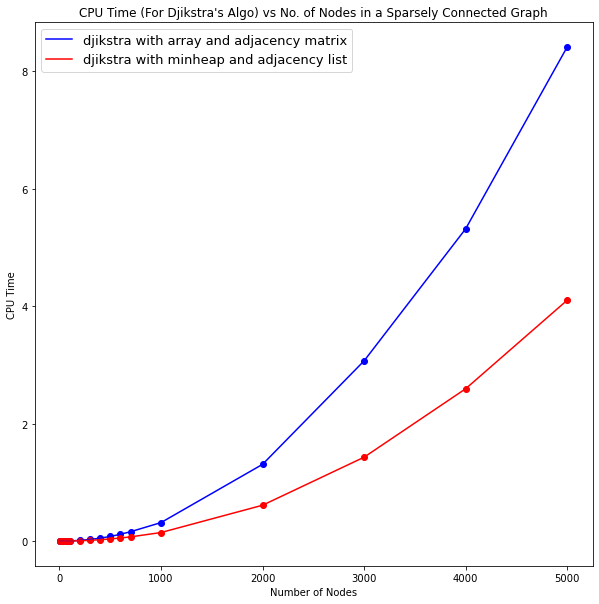

In [41]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize =(10, 10))
 
x =[5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]
 
y=timearray
y2=timelist
plt.plot(x,y,c="blue")
plt.plot(x,y2,c="red")
plt.legend(['djikstra with array and adjacency matrix','djikstra with minheap and adjacency list'],fontsize=13)
plt.scatter(x, y, c ="blue")
plt.scatter(x, y2, c ="red")
plt.xlabel("Number of Nodes")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. of Nodes in a Sparsely Connected Graph")
# To show the plot

plt.show()

## 2. Average Density Graph (Partially Connected Graph)

In [42]:
import time
timearray=[]
timelist=[]
for nodedim in [5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]:
    amat=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,True,0.5,"matrix",True)
    alist=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,True,0.5,"list",True)
    starray=time.process_time()
    dm,pim=djikstramatarray(amat,0)
    etarray=time.process_time()
    timearray.append(etarray-starray)
    stlist=time.process_time()
    dl,pil=djikstralistheap(alist,0)
    etlist=time.process_time()
    timelist.append(etlist-stlist)
print(timearray)  
print(timelist)

[0.00029000000000678483, 6.500000000642103e-05, 0.00043299999998680505, 0.0009940000000199234, 0.0019020000000011805, 0.003918999999996231, 0.014577000000002727, 0.03344600000002629, 0.059053000000005795, 0.09486799999999107, 0.1364330000000109, 0.18551700000000437, 0.38072299999998904, 1.5280810000000145, 3.4832660000000146, 6.252020000000016, 9.905293000000029]
[0.000160999999991418, 4.0000000012696546e-05, 0.00021999999998456587, 0.0005280000000027485, 0.001024000000001024, 0.0020190000000184227, 0.008271000000007689, 0.017954000000003134, 0.03236000000001127, 0.05106599999999162, 0.07527599999997392, 0.1018280000000118, 0.21299500000000648, 0.8604430000000036, 2.0308670000000006, 3.5760440000000244, 5.624418999999989]


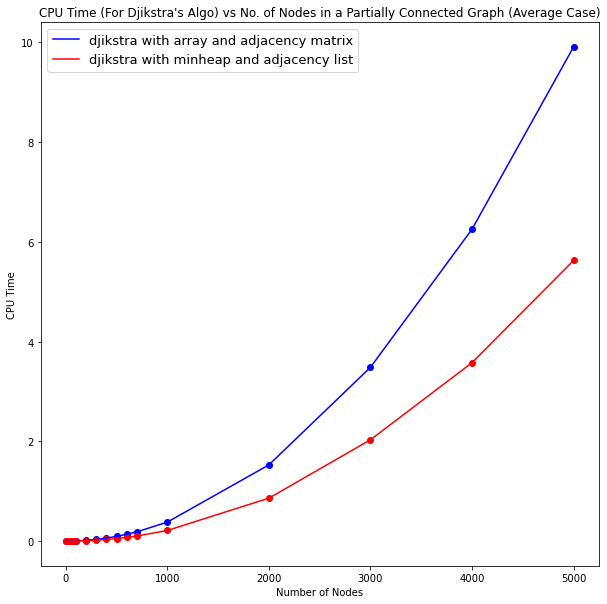

In [43]:
fig = plt.figure(figsize =(10, 10))
 
x =[5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]
 
y=timearray
y2=timelist
plt.plot(x,y,c="blue")
plt.plot(x,y2,c="red")
plt.legend(['djikstra with array and adjacency matrix','djikstra with minheap and adjacency list'],fontsize=13)
plt.scatter(x, y, c ="blue")
plt.scatter(x, y2, c ="red")
plt.xlabel("Number of Nodes")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. of Nodes in a Partially Connected Graph (Average Case)")
# To show the plot

plt.show()

## 3. Densely Connected Graph

In [44]:
timearray=[]
timelist=[]
for nodedim in [5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]:
    amat=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,True,0.9,"matrix",True)
    alist=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,True,0.9,"list",True)
    starray=time.process_time()
    dm,pim=djikstramatarray(amat,0)
    etarray=time.process_time()
    timearray.append(etarray-starray)
    stlist=time.process_time()
    dl,pil=djikstralistheap(alist,0)
    etlist=time.process_time()
    timelist.append(etlist-stlist)
print(timearray)  
print(timelist)

[0.00038799999992988887, 7.699999991928053e-05, 0.0004890000000159489, 0.0011489999999412248, 0.002138000000059037, 0.004346000000055028, 0.017189999999914107, 0.03903600000001006, 0.06781899999998586, 0.1078499999999849, 0.15614499999992404, 0.22138299999994615, 0.4333840000000464, 1.723598999999922, 3.9091720000000123, 7.06561899999997, 10.918753999999808]
[6.60000000607397e-05, 4.6999999995023245e-05, 0.00027899999997771374, 0.0007580000000189102, 0.0014700000000402724, 0.002856999999949039, 0.011141999999949803, 0.025241000000050917, 0.04464699999994082, 0.07166499999993903, 0.10213299999998071, 0.13669900000002144, 0.2773650000000316, 1.104518999999982, 2.50827199999992, 4.914319999999975, 7.807251999999835]


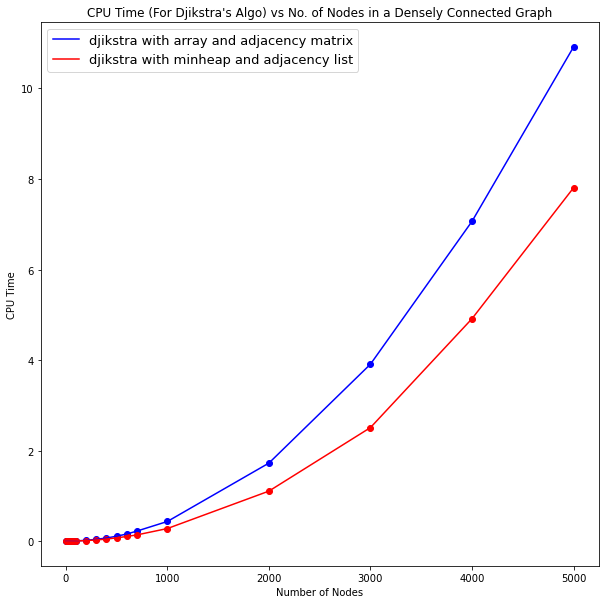

In [45]:
fig = plt.figure(figsize =(10, 10))
 
x =[5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]
 
y=timearray
y2=timelist
plt.plot(x,y,c="blue")
plt.plot(x,y2,c="red")
plt.legend(['djikstra with array and adjacency matrix','djikstra with minheap and adjacency list'],fontsize=13)
plt.scatter(x, y, c ="blue")
plt.scatter(x, y2, c ="red")
plt.xlabel("Number of Nodes")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. of Nodes in a Densely Connected Graph")
# To show the plot

plt.show()

## 4. Complete Graph (Worst Case)

In [46]:
import time
timearray=[]
timelist=[]
for nodedim in [5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]:
    amat=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,True,1,"matrix",True)
    alist=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,True,1,"list",True)
    starray=time.process_time()
    dm,pim=djikstramatarray(amat,0)
    etarray=time.process_time()
    timearray.append(etarray-starray)
    stlist=time.process_time()
    dl,pil=djikstralistheap(alist,0)
    etlist=time.process_time()
    timelist.append(etlist-stlist)
print(timearray)  
print(timelist)

[0.00029599999993479287, 8.09999999091815e-05, 0.000734999999849606, 0.001216999999996915, 0.0022559999999884894, 0.004480000000057771, 0.01717600000006314, 0.039066999999931795, 0.0704000000000633, 0.10803699999996752, 0.15625500000010106, 0.21852399999988847, 0.4354080000000522, 1.7677590000000691, 3.9433960000001207, 7.234719999999925, 11.384104999999863]
[6.69999999445281e-05, 4.600000011123484e-05, 0.000381000000061249, 0.0007640000001174485, 0.0014840000001186127, 0.0030959999999140564, 0.019628000000011525, 0.02627800000004754, 0.04762200000004668, 0.07248699999991004, 0.10443099999997685, 0.14196500000002743, 0.290679000000182, 1.1755419999999503, 2.669104999999945, 5.269261000000142, 8.4103369999998]


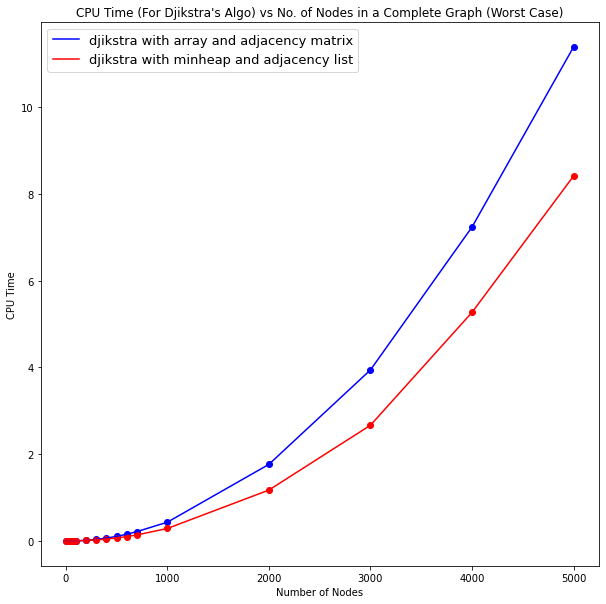

In [48]:
fig = plt.figure(figsize =(10, 10))
 
x =[5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]
 
y=timearray
y2=timelist
plt.plot(x,y,c="blue")
plt.plot(x,y2,c="red")
plt.legend(['djikstra with array and adjacency matrix','djikstra with minheap and adjacency list'],fontsize=13)
plt.scatter(x, y, c ="blue")
plt.scatter(x, y2, c ="red")
plt.xlabel("Number of Nodes")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. of Nodes in a Complete Graph (Worst Case)")
# To show the plot

plt.show()

## 5. Strongly Connected Graph

In [51]:
timearray=[]
timelist=[]
for nodedim in [5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]:
    amat=stronglyconnectedgraphwanddirectedmatandlist(nodedim,0.5,"matrix")
    alist=stronglyconnectedgraphwanddirectedmatandlist(nodedim,0.5,"list")
    starray=time.process_time()
    dm,pim=djikstramatarray(amat,0)
    etarray=time.process_time()
    timearray.append(etarray-starray)
    stlist=time.process_time()
    dl,pil=djikstralistheap(alist,0)
    etlist=time.process_time()
    timelist.append(etlist-stlist)
print(timearray)
print(timelist)

[0.01156700000001365, 8.400000001529406e-05, 0.0004259999998339481, 0.0010040000001936278, 0.0019119999999475112, 0.0038749999998799467, 0.01467699999989236, 0.032993000000033135, 0.05992400000013731, 0.09335000000010041, 0.13848000000007232, 0.18521999999984473, 0.3861469999997098, 1.5371689999997216, 3.473178000000189, 6.183921999999711, 9.743635999999697]
[0.00020399999993969686, 3.599999990910874e-05, 0.00020199999994474638, 0.0005240000000412692, 0.0010389999999915744, 0.002095000000053915, 0.008055999999896812, 0.01827299999990828, 0.03254900000001726, 0.05071599999996579, 0.0760269999996126, 0.1026400000000649, 0.21705100000008315, 0.857300999999552, 1.9151520000000346, 3.4397039999998924, 5.530173999999988]


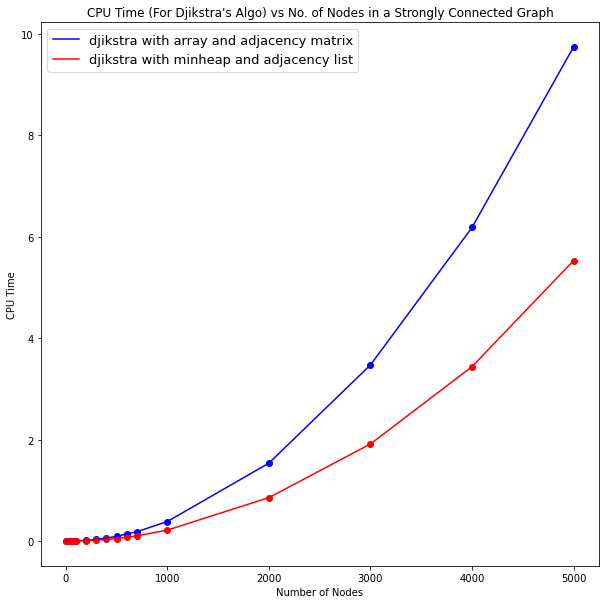

In [52]:
fig = plt.figure(figsize =(10, 10))
 
x =[5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]
 
y=timearray
y2=timelist
plt.plot(x,y,c="blue")
plt.plot(x,y2,c="red")
plt.legend(['djikstra with array and adjacency matrix','djikstra with minheap and adjacency list'],fontsize=13)
plt.scatter(x, y, c ="blue")
plt.scatter(x, y2, c ="red")
plt.xlabel("Number of Nodes")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. of Nodes in a Strongly Connected Graph")
# To show the plot

plt.show()

## 6. Uniformly-Weighted Sparsely Connected Graph

In [53]:
timearray=[]
timelist=[]
for nodedim in [5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]:
    amat=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,False,0.2,"matrix",True)
    alist=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,False,0.2,"list",True)
    starray=time.process_time()
    dm,pim=djikstramatarray(amat,0)
    etarray=time.process_time()
    timearray.append(etarray-starray)
    stlist=time.process_time()
    dl,pil=djikstralistheap(alist,0)
    etlist=time.process_time()
    timelist.append(etlist-stlist)
print(timearray)  
print(timelist)

[0.000424999999722786, 5.400000009103678e-05, 0.0002779999999802385, 0.0007239999999910651, 0.0013030000000071595, 0.002695000000130676, 0.009966000000076747, 0.02243899999984933, 0.04039599999987331, 0.06424299999980576, 0.09279499999956897, 0.1250279999999293, 0.25546299999996336, 1.0237640000000283, 2.317222000000129, 4.13017200000013, 6.533730999999989]
[0.004523000000062893, 2.500000027794158e-05, 9.600000021237065e-05, 0.00021900000001551234, 0.00040300000000570435, 0.0007890000001680164, 0.0028459999998631247, 0.006301999999777763, 0.011041000000204804, 0.01717000000007829, 0.024896999999782565, 0.0336050000000796, 0.068065999999817, 0.26603099999965707, 0.6006499999998596, 1.0568459999999504, 1.6531660000000556]


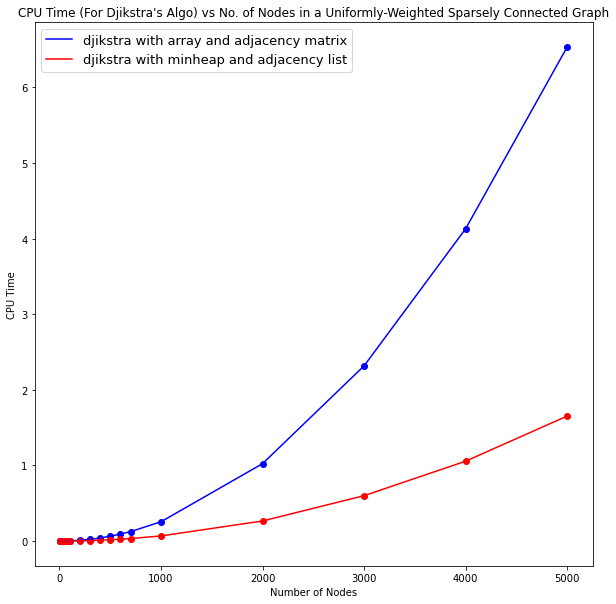

In [54]:
fig = plt.figure(figsize =(10, 10))
 
x =[5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]
 
y=timearray
y2=timelist
plt.plot(x,y,c="blue")
plt.plot(x,y2,c="red")
plt.legend(['djikstra with array and adjacency matrix','djikstra with minheap and adjacency list'],fontsize=13)
plt.scatter(x, y, c ="blue")
plt.scatter(x, y2, c ="red")
plt.xlabel("Number of Nodes")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. of Nodes in a Uniformly-Weighted Sparsely Connected Graph")
# To show the plot

plt.show()

## 7. Uniformly-Weighted Partially Connected Graph

In [55]:
timearray=[]
timelist=[]
for nodedim in [5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]:
    amat=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,False,0.5,"matrix",True)
    alist=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,False,0.5,"list",True)
    starray=time.process_time()
    dm,pim=djikstramatarray(amat,0)
    etarray=time.process_time()
    timearray.append(etarray-starray)
    stlist=time.process_time()
    dl,pil=djikstralistheap(alist,0)
    etlist=time.process_time()
    timelist.append(etlist-stlist)
print(timearray)  
print(timelist)

[0.00035800000023300527, 7.899999991423101e-05, 0.000349999999798456, 0.0008400000001529406, 0.001623000000108732, 0.0032320000000254367, 0.01231999999981781, 0.027454999999918073, 0.0494090000001961, 0.07635700000037104, 0.11255899999969188, 0.15237799999977142, 0.3127609999996821, 1.2355489999999918, 2.7977420000001985, 4.943393000000015, 7.910382999999911]
[8.200000002034358e-05, 2.7999999929306796e-05, 0.00015100000018719584, 0.0003560000000106811, 0.0006789999997636187, 0.0013299999995979306, 0.005090999999993073, 0.011215999999876658, 0.01965699999982462, 0.030768000000080065, 0.04391100000020742, 0.060011000000031345, 0.12086300000009942, 0.4830269999997654, 1.0760059999997793, 1.915813000000071, 3.0351180000002387]


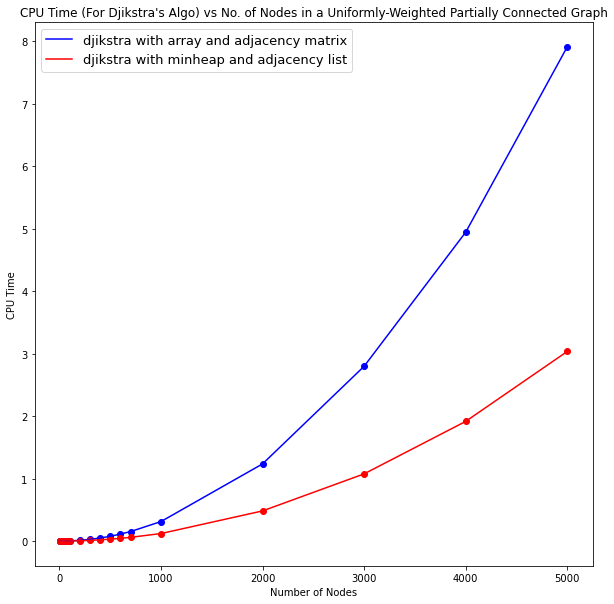

In [56]:
fig = plt.figure(figsize =(10, 10))
 
x =[5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]
 
y=timearray
y2=timelist
plt.plot(x,y,c="blue")
plt.plot(x,y2,c="red")
plt.legend(['djikstra with array and adjacency matrix','djikstra with minheap and adjacency list'],fontsize=13)
plt.scatter(x, y, c ="blue")
plt.scatter(x, y2, c ="red")
plt.xlabel("Number of Nodes")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. of Nodes in a Uniformly-Weighted Partially Connected Graph")
# To show the plot

plt.show()

## 8. Uniformly-Weighted Complete Graph

In [60]:
timearray=[]
timelist=[]
for nodedim in [5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]:
    amat=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,False,1,"matrix",True)
    alist=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,False,1,"list",True)
    starray=time.process_time()
    dm,pim=djikstramatarray(amat,0)
    etarray=time.process_time()
    timearray.append(etarray-starray)
    stlist=time.process_time()
    dl,pil=djikstralistheap(alist,0)
    etlist=time.process_time()
    timelist.append(etlist-stlist)
print(timearray)  
print(timelist)

[0.0035719999996217666, 7.400000004054164e-05, 0.00040300000000570435, 0.001051000000188651, 0.0019419999998717685, 0.003924000000097294, 0.014759000000140077, 0.03380800000013551, 0.059271999999964464, 0.09236100000043734, 0.13496100000020306, 0.18417100000033315, 0.37134100000002945, 1.535005000000183, 3.4435349999998834, 6.103479000000334, 10.798739999999725]
[6.299999995462713e-05, 3.599999990910874e-05, 0.00021900000001551234, 0.0005710000000362925, 0.0011179999996784318, 0.0022030000000086147, 0.008435000000190485, 0.018691999999646214, 0.03327599999965969, 0.0514869999997245, 0.07438700000011522, 0.10110200000008263, 0.2053240000000187, 0.8179340000001503, 1.8328350000001592, 3.721870000000308, 5.599050000000261]


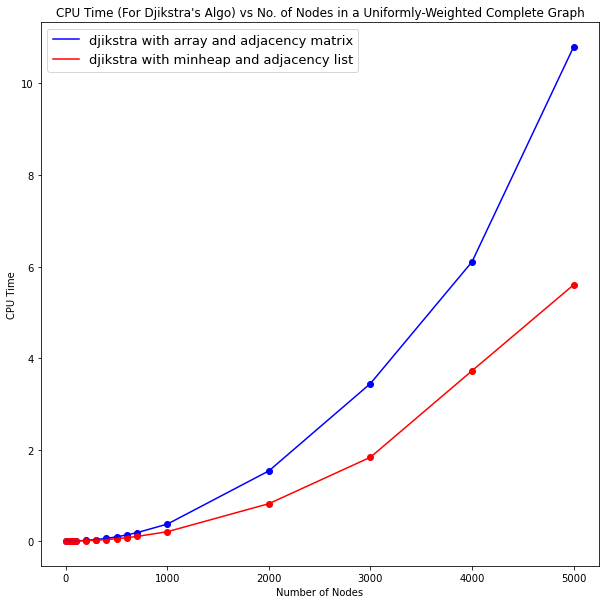

In [61]:
fig = plt.figure(figsize =(10, 10))
 
x =[5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]
 
y=timearray
y2=timelist
plt.plot(x,y,c="blue")
plt.plot(x,y2,c="red")
plt.legend(['djikstra with array and adjacency matrix','djikstra with minheap and adjacency list'],fontsize=13)
plt.scatter(x, y, c ="blue")
plt.scatter(x, y2, c ="red")
plt.xlabel("Number of Nodes")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. of Nodes in a Uniformly-Weighted Complete Graph")
# To show the plot

plt.show()

## 9. Directed Acyclic Graph (With Random Weights)

In [85]:
import networkx as nx
import random

def generate_random_weighted_dag(n,rep):
    G = nx.DiGraph()

    # Add nodes to the graph
    G.add_nodes_from(range(n))

    # Create a list of all possible edges
    edges = [(i, j) for i in range(n) for j in range(i+1, n)]

    # Randomly shuffle the list of edges
    random.shuffle(edges)

    # Add edges while ensuring no cycles
    for edge in edges:
        G.add_edge(*edge)
        if not nx.is_directed_acyclic_graph(G):
            G.remove_edge(*edge)

    # Assign random weights to the edges
    for edge in G.edges():
        G.edges[edge]['weight'] = random.uniform(1, 10)
    # Convert the graph to an adjacency matrix
    if(rep=="matrix"):
        adj_matrix = nx.to_numpy_matrix(G, weight='weight')
        adjmatrix=np.array(adj_matrix)
        return adjmatrix
    if(rep=="list"):
        adj_list = {}
        for node in G.nodes():
            neighbors = [(neighbor, G[node][neighbor]['weight']) for neighbor in G.neighbors(node)]
            adj_list[node] = neighbors
        return(adj_list)
   



In [92]:
timearray=[]
timelist=[]
for nodedim in [5,10,30,50,70,100]:
    amat=generate_random_weighted_dag(nodedim,"matrix")
    alist=generate_random_weighted_dag(nodedim,"list")
    starray=time.process_time()
    dm,pim=djikstramatarray(amat,0)
    etarray=time.process_time()
    timearray.append(etarray-starray)
    stlist=time.process_time()
    dl,pil=djikstralistheap(alist,0)
    etlist=time.process_time()
    timelist.append(etlist-stlist)
print(timearray)  
print(timelist)

[0.00012200000128359534, 0.00012400000014167745, 0.0004090000002179295, 0.0010780000011436641, 0.00195499999972526, 0.0038030000014259713]
[6.0999998822808266e-05, 5.999999848427251e-05, 0.00020400000175868627, 0.0006069999999454012, 0.0010089999996125698, 0.0017520000001240987]


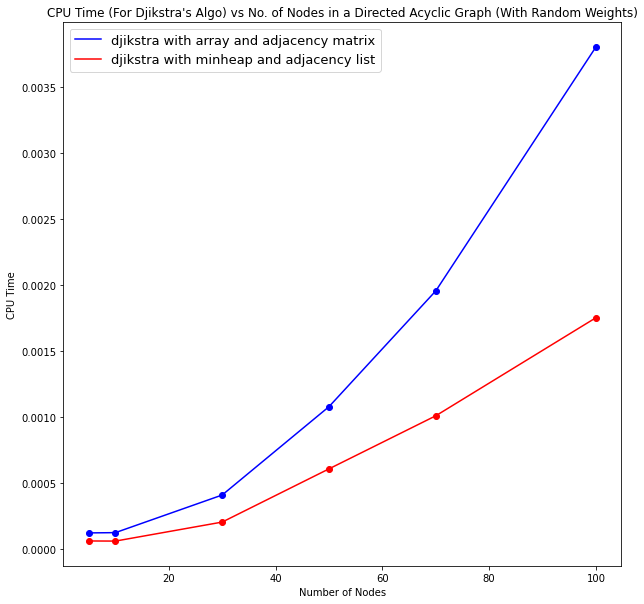

In [93]:
fig = plt.figure(figsize =(10, 10))
 
x =[5,10,30,50,70,100]
 
y=timearray
y2=timelist
plt.plot(x,y,c="blue")
plt.plot(x,y2,c="red")
plt.legend(['djikstra with array and adjacency matrix','djikstra with minheap and adjacency list'],fontsize=13)
plt.scatter(x, y, c ="blue")
plt.scatter(x, y2, c ="red")
plt.xlabel("Number of Nodes")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. of Nodes in a Directed Acyclic Graph (With Random Weights)")
# To show the plot

plt.show()

## 10. Undirected Graph (With Random Weights and Partially Connected)

In [82]:
def create_random_weighted_ud_graph(num_nodes, edge_creation_prob,rep):
    G = nx.Graph()
    for i in range(num_nodes):
        G.add_node(i)
        for j in range(i+1, num_nodes):
            if random.random() <= edge_creation_prob:
                weight = random.uniform(1, 10)  # Random weight between 1 and 10
                G.add_edge(i, j, weight=weight)
    if(rep=="list"):
        adj_list = {}
        for node in G.nodes():
            neighbors = []
            for neighbor in G.neighbors(node):
                neighbors.append((neighbor, G[node][neighbor]['weight']))
            adj_list[node] = neighbors
        return adj_list
    elif (rep=="matrix"):
        
        adj_matrix = np.zeros((num_nodes, num_nodes))

        for node1, node2, data in G.edges(data=True):
            weight = data['weight']
            adj_matrix[node1][node2] = weight
            adj_matrix[node2][node1] = weight  # Since the graph is non-directed

        return adj_matrix

In [83]:
timearray=[]
timelist=[]
for nodedim in [5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]:
    amat=create_random_weighted_ud_graph(nodedim, 0.5,"matrix")
    alist=create_random_weighted_ud_graph(nodedim, 0.5,"list")
    starray=time.process_time()
    dm,pim=djikstramatarray(amat,0)
    etarray=time.process_time()
    timearray.append(etarray-starray)
    stlist=time.process_time()
    dl,pil=djikstralistheap(alist,0)
    etlist=time.process_time()
    timelist.append(etlist-stlist)
print(timearray)  
print(timelist)

[0.00010699999984353781, 7.999999979801942e-05, 0.000700999999025953, 0.0021480000013980316, 0.0031600000002072193, 0.0033349999994243262, 0.009058999999979278, 0.0208970000003319, 0.03843799999958719, 0.05874699999912991, 0.0863790000003064, 0.11867399999937334, 0.24414400000023306, 1.0104209999990417, 2.327940999999555, 4.209703000000445, 6.750545999999304]
[4.5000000682193786e-05, 4.599999920174014e-05, 0.00036999999974796083, 0.0007379999988188501, 0.0012829999996029073, 0.0018280000003869645, 0.005246999999144464, 0.012300000000323053, 0.022149000000354135, 0.03555899999992107, 0.05503300000054878, 0.07354699999996228, 0.16148600000087754, 0.7282260000010865, 1.7199039999995875, 3.2382719999986875, 5.221276000000216]


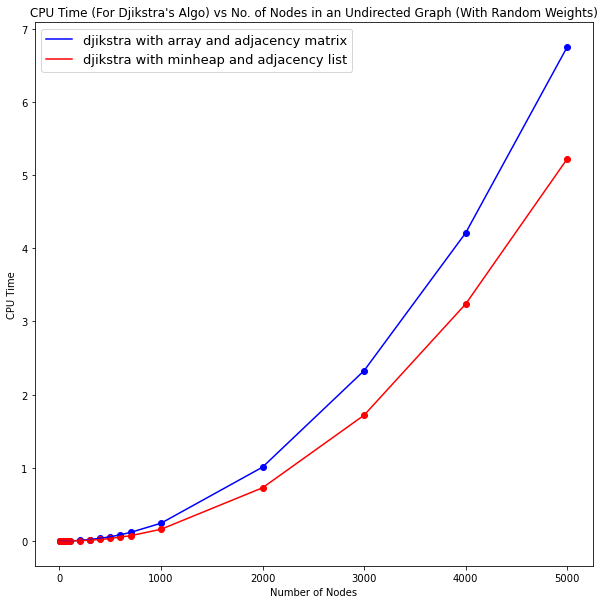

In [84]:
fig = plt.figure(figsize =(10, 10))
 
x =[5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]
 
y=timearray
y2=timelist
plt.plot(x,y,c="blue")
plt.plot(x,y2,c="red")
plt.legend(['djikstra with array and adjacency matrix','djikstra with minheap and adjacency list'],fontsize=13)
plt.scatter(x, y, c ="blue")
plt.scatter(x, y2, c ="red")
plt.xlabel("Number of Nodes")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. of Nodes in an Undirected Graph (With Random Weights)")
# To show the plot

plt.show()

# For theoretical analysis of part a

## We are assuming the source is fixed and shortest distances to all other nodes will be computed in a result array to be returned. 

### First implementation- average case is O(V^2 + E) as the outermost while loop will run at the most V times and finding minimum array element will take O(V) worst case. And the inner for loop will iterate E times (at the most) if all edges are inspected. So O(V^2+E)...average case scenario will be a directed average density randomly weighted graph with reasonable number of nodes...E is still not comparable to V^2 in avg case so result is approx O(V^2)
### Best case is either a very sparse graph(E is proportional to V) where E<<<V^2 so complexity is approx O(V^2)..and also less number of nodes..or a graph where the source is directly connected to all vertices..ideally best case can be O(1) if source node not connected to any1 else but that is unrealistic
### Worst case is a very densely connected graph/ a complete graph with a large number of nodes..here E is also approx V^2 as all possible edges are almost present..so O(V^2) here too
// shld we mention list removal worst case is O(V) and append is O(1) or not reqd- TBD

// also the res part- do we j ignore while considering this TC- TBD

# For theoretical analysis of part b

### Second implementation- average case is O((V+E)logV)
### The nodes are first inserted in a priority queue and then extracted one by one leading to O(V log V). Once a node is extracted, we iterate through its edges and update the priority queue accordingly. Note that every edge is explored only once, moreover, updating the priority queue is O(log V), leading to an overall O(E log V).
### TLDR. You have V extractions from the priority queue and E updates to the priority queue, leading to an overall O((V + E) log V). Average case scenario will be a directed average density randomly weighted graph with reasonable number of nodes
### Best case is either a very sparse graph(E is proportional to V) and also less number of nodes..or a graph where the source is directly connected to all vertices..ideally best case can be O(1) if source node not connected to any1 else but that is unrealistic...so here O(VlogV)
### Worst case is a very densely connected graph/ a complete graph with a large number of nodes..here E is also approx V^2 as all possible edges are almost present..so O(V^2logV)or O(ElogV) as E>>>V
// how to compare adjlist n adjmat for TC or just for SC?..smth related to their element/edge access times?- TBD


# For Empricial analysis of part a

In [94]:
def templateforsparsedensepartialfullandconnectedweightedorunwdirected2(n,weights,p,rep,directedbool):
    # Define the number of nodes and the probability of edge creation

    # Generate a random directed graph
    G = nx.gnp_random_graph(n, p, directed=directedbool)

    # Assign random weights to the edges
    if(weights):
        for u, v in G.edges():
            G[u][v]['weight'] = np.random.randint(1, 10)# Random weights from 1 to 10
    else:
        for u, v in G.edges():
            G[u][v]['weight'] = 1

    # Convert the graph to an adjacency matrix
    if(rep=="matrix"):
        adj_matrix = nx.to_numpy_matrix(G, weight='weight')
        adjmatrix=np.array(adj_matrix)
        return adjmatrix,len(G.edges())
    if(rep=="list"):
        adj_list = {}
        for node in G.nodes():
            neighbors = [(neighbor, G[node][neighbor]['weight']) for neighbor in G.neighbors(node)]
            adj_list[node] = neighbors
        return(adj_list),len(G.edges())

In [113]:
timearray=[]
xseries=[]
for prob in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    amat,edge=templateforsparsedensepartialfullandconnectedweightedorunwdirected2(2500,True,prob,"matrix",True)
    starray=time.process_time()
    dm,pim=djikstramatarray(amat,0)
    etarray=time.process_time()
    timearray.append(etarray-starray)
    xseries.append(edge)
print(timearray)  
print(xseries)

[1.9355189999987488, 2.1018910000002506, 2.188535999999658, 2.3130700000001525, 2.405627000000095, 2.490490000000136, 2.602511000000959, 2.6502200000013545, 2.7184870000000956, 2.7758950000006735]
[623901, 1249691, 1875374, 2499099, 3122807, 3748285, 4372716, 4998956, 5623737, 6247500]


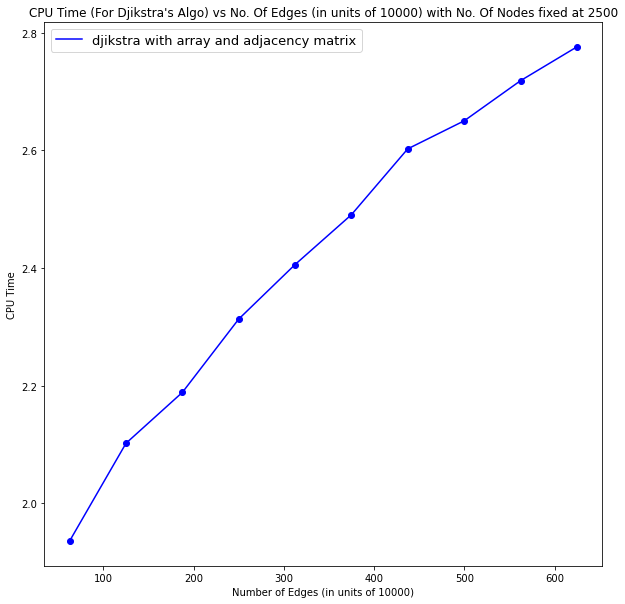

In [118]:
fig = plt.figure(figsize =(10, 10))
 
x =[X/10000 for X in xseries]
 
y=timearray

plt.plot(x,y,c="blue")

plt.legend(['djikstra with array and adjacency matrix'],fontsize=13)
plt.scatter(x, y, c ="blue")

plt.xlabel("Number of Edges (in units of 10000)")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. Of Edges (in units of 10000) with No. Of Nodes fixed at 2500")
# To show the plot

plt.show()

In [119]:

timearray=[]

for nodedim in [5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]:
    amat=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,True,0.5,"matrix",True)
    
    starray=time.process_time()
    dm,pim=djikstramatarray(amat,0)
    etarray=time.process_time()
    timearray.append(etarray-starray)
    
print(timearray)  


[0.0003240000005462207, 0.00012900000001536682, 0.0007189999996626284, 0.0022959999987506308, 0.002033000000665197, 0.0038420000000769505, 0.014369999998962157, 0.03312999999980093, 0.06074300000000221, 0.09263699999974051, 0.134952999998859, 0.1837790000008681, 0.38100200000008044, 1.5413799999987532, 3.5306000000000495, 6.219941000001199, 9.855626000000484]


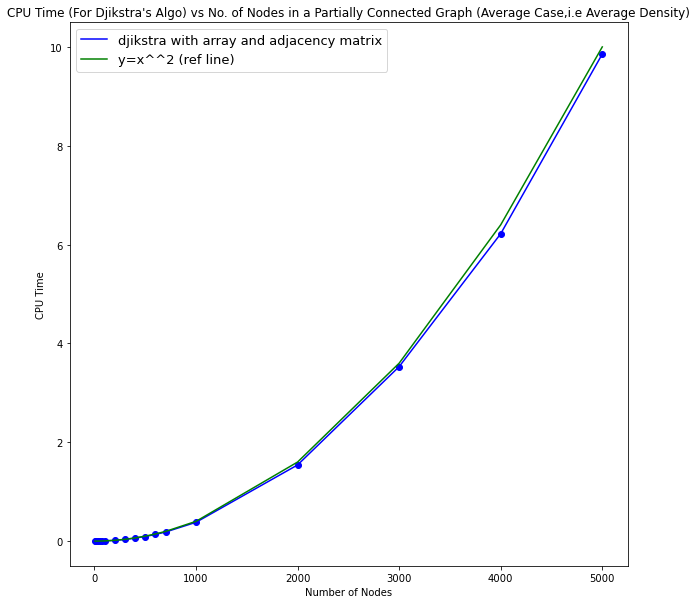

In [180]:
fig = plt.figure(figsize =(10, 10))
 
x =[5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]

yrr=[(xr**2)/2500000 for xr in x ]

ytemp=[0.0003240000005462207, 0.00012900000001536682, 0.0007189999996626284, 0.0022959999987506308, 0.002033000000665197, 0.0038420000000769505, 0.014369999998962157, 0.03312999999980093, 0.06074300000000221, 0.09263699999974051, 0.134952999998859, 0.1837790000008681, 0.38100200000008044, 1.5413799999987532, 3.5306000000000495, 6.219941000001199, 9.855626000000484]
plt.plot(x, ytemp,c="blue")
plt.plot(x,yrr,c="green")





plt.legend(['djikstra with array and adjacency matrix','y=x^^2 (ref line)'],fontsize=13)
plt.scatter(x, ytemp, c ="blue")
plt.xlabel("Number of Nodes")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. of Nodes in a Partially Connected Graph (Average Case,i.e Average Density)")
# To show the plot

plt.show()

In [121]:
timearray=[]

for nodedim in [5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]:
    amat=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,True,1,"matrix",True)
    
    starray=time.process_time()
    dm,pim=djikstramatarray(amat,0)
    etarray=time.process_time()
    timearray.append(etarray-starray)
    
print(timearray) 

[0.0007280000008904608, 8.800000068731606e-05, 0.0004779999999300344, 0.001186999999845284, 0.002243000000817119, 0.004584000000249944, 0.01749000000017986, 0.040006999999604886, 0.07885100000021339, 0.10907299999962561, 0.1571989999993093, 0.21728299999995215, 0.4364590000004682, 1.7893010000007052, 4.0274480000007316, 7.185043999999834, 11.518061000000671]


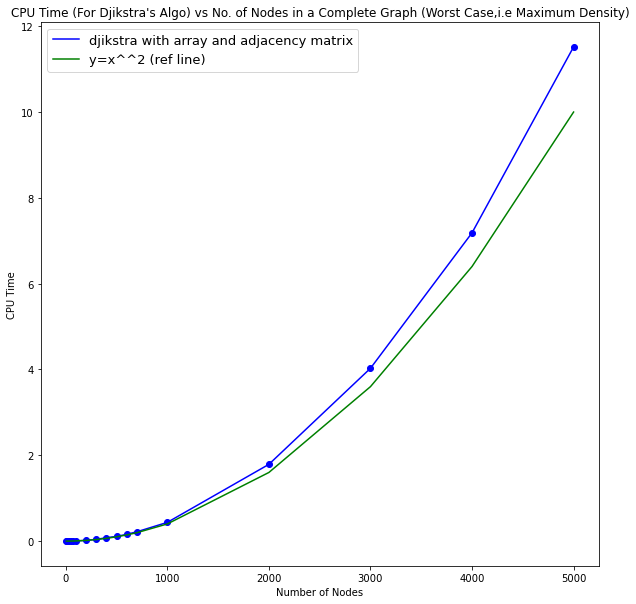

In [181]:
fig = plt.figure(figsize =(10, 10))
 
x =[5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]

yrr=[(xr**2)/2500000 for xr in x ]

ytemp=[0.0007280000008904608, 8.800000068731606e-05, 0.0004779999999300344, 0.001186999999845284, 0.002243000000817119, 0.004584000000249944, 0.01749000000017986, 0.040006999999604886, 0.07885100000021339, 0.10907299999962561, 0.1571989999993093, 0.21728299999995215, 0.4364590000004682, 1.7893010000007052, 4.0274480000007316, 7.185043999999834, 11.518061000000671]
plt.plot(x, ytemp,c="blue")
plt.plot(x,yrr,c="green")




plt.legend(['djikstra with array and adjacency matrix','y=x^^2 (ref line)'],fontsize=13)
plt.scatter(x, ytemp, c ="blue")
plt.xlabel("Number of Nodes")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. of Nodes in a Complete Graph (Worst Case,i.e Maximum Density)")
# To show the plot

plt.show()

# For Empirical Analysis of part b

In [123]:
timelist=[]
xseries=[]
for prob in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    alist,edge=templateforsparsedensepartialfullandconnectedweightedorunwdirected2(2500,True,prob,"list",True)
    stlist=time.process_time()
    dl,pil=djikstralistheap(alist,0)
    etlist=time.process_time()
    timelist.append(etlist-stlist)
    xseries.append(edge)
print(timelist)  
print(xseries)

[0.8172880000001896, 0.9411899999995512, 1.1342230000009295, 1.2385590000012598, 1.3325480000003154, 1.4339959999997518, 1.5399300000008225, 1.6605999999992491, 1.7480439999999362, 1.8514580000010028]
[624938, 1250271, 1874148, 2498766, 3123070, 3749115, 4372035, 4996336, 5622014, 6247500]


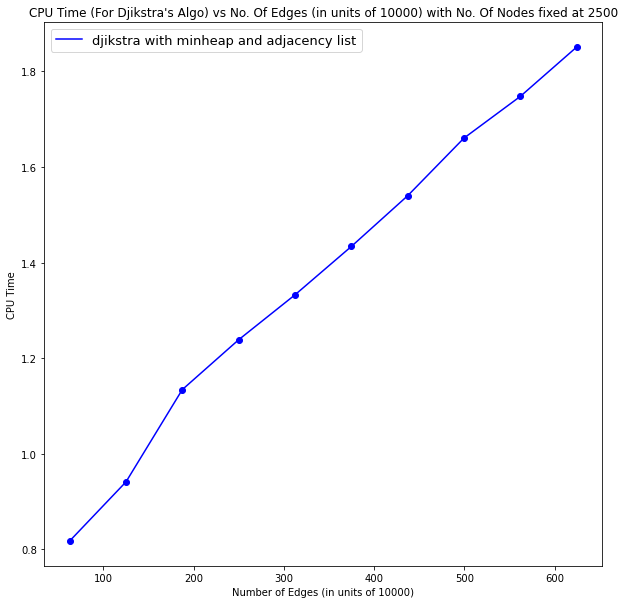

In [124]:
fig = plt.figure(figsize =(10, 10))
 
x =[X/10000 for X in xseries]
 
y=timelist

plt.plot(x,y,c="blue")

plt.legend(['djikstra with minheap and adjacency list'],fontsize=13)
plt.scatter(x, y, c ="blue")

plt.xlabel("Number of Edges (in units of 10000)")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. Of Edges (in units of 10000) with No. Of Nodes fixed at 2500")
# To show the plot

plt.show()

In [125]:

timelist=[]
for nodedim in [5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]:

    alist=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,True,0.5,"list",True)
   
    stlist=time.process_time()
    dl,pil=djikstralistheap(alist,0)
    etlist=time.process_time()
    timelist.append(etlist-stlist)
 
print(timelist)

[7.60000002628658e-05, 3.7000001611886546e-05, 0.0002120000008289935, 0.0005299999993439997, 0.0009979999995266553, 0.0020160000003670575, 0.008034000000407104, 0.01792600000044331, 0.03327999999964959, 0.05109000000084052, 0.07464699999945879, 0.10059800000090036, 0.21500399999968067, 0.8689660000000003, 1.9485419999982696, 3.6661459999995714, 5.662838999998712]


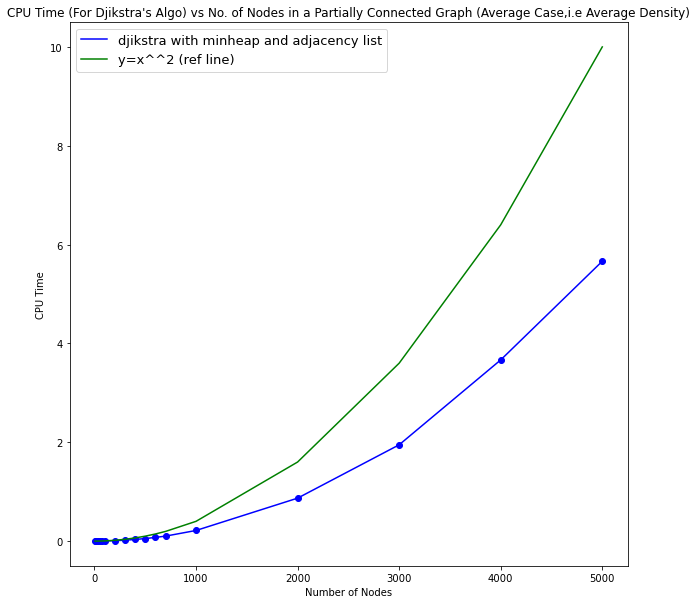

In [176]:
fig = plt.figure(figsize =(10, 10))
 
x =[5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]

y=[7.60000002628658e-05, 3.7000001611886546e-05, 0.0002120000008289935, 0.0005299999993439997, 0.0009979999995266553, 0.0020160000003670575, 0.008034000000407104, 0.01792600000044331, 0.03327999999964959, 0.05109000000084052, 0.07464699999945879, 0.10059800000090036, 0.21500399999968067, 0.8689660000000003, 1.9485419999982696, 3.6661459999995714, 5.662838999998712]

ytemp=[(xr**2)/2500000 for xr in x ]

plt.plot(x,y,c="blue")

plt.plot(x, ytemp,c="green")
plt.legend(['djikstra with minheap and adjacency list','y=x^^2 (ref line)'],fontsize=13)
plt.scatter(x, y, c ="blue")

plt.xlabel("Number of Nodes")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. of Nodes in a Partially Connected Graph (Average Case,i.e Average Density)")
# To show the plot

plt.show()

In [167]:
timelist=[]
for nodedim in [5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]:

    alist=templateforsparsedensepartialfullandconnectedweightedorunwdirected(nodedim,True,1,"list",True)
   
    stlist=time.process_time()
    dl,pil=djikstralistheap(alist,0)
    etlist=time.process_time()
    timelist.append(etlist-stlist)
 
print(timelist)

[0.0001429999992978992, 5.199999941396527e-05, 0.0002989999993587844, 0.0007650000006833579, 0.0014649999993707752, 0.003101000000242493, 0.012081999999281834, 0.026584000001093955, 0.04860799999914889, 0.07452999999986787, 0.10559599999942293, 0.1445530000000872, 0.2940179999986867, 1.171215000000302, 2.6640820000011445, 5.338150999999925, 8.389868999998725]


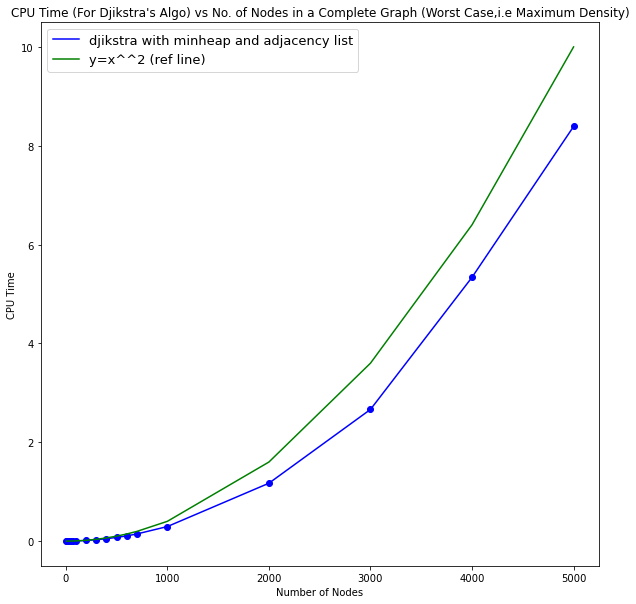

In [177]:
fig = plt.figure(figsize =(10, 10))
 
x =[5,10,30,50,70,100,200,300,400,500,600,700,1000,2000,3000,4000,5000]

y=[0.0001429999992978992, 5.199999941396527e-05, 0.0002989999993587844, 0.0007650000006833579, 0.0014649999993707752, 0.003101000000242493, 0.012081999999281834, 0.026584000001093955, 0.04860799999914889, 0.07452999999986787, 0.10559599999942293, 0.1445530000000872, 0.2940179999986867, 1.171215000000302, 2.6640820000011445, 5.338150999999925, 8.389868999998725]

ytemp=[(xr**2)/2500000 for xr in x ]

plt.plot(x,y,c="blue")

plt.plot(x, ytemp,c="green")
plt.legend(['djikstra with minheap and adjacency list','y=x^^2 (ref line)'],fontsize=13)
plt.scatter(x, y, c ="blue")

plt.xlabel("Number of Nodes")
plt.ylabel("CPU Time")
plt.title("CPU Time (For Djikstra's Algo) vs No. of Nodes in a Complete Graph (Worst Case,i.e Maximum Density)")
# To show the plot

plt.show()